In [23]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [24]:
from fastai import *
from fastai.vision import *

In [25]:
'''
from lib.fastai.fastai import *
from lib.fastai.fastai.vision import *
'''

'\nfrom lib.fastai.fastai import *\nfrom lib.fastai.fastai.vision import *\n'

In [26]:
df_train = pd.read_csv('training-data/train.csv', header = None, usecols = [0,1], names = ['file', 'label'])

In [27]:
df_train.head()

,file,label
0,1000000965.jpg,40
1,1310005493.jpg,31
2,1050002320.jpg,37
3,1340001721.jpg,33
4,1650001155.jpg,3


In [28]:
path = 'training-data/train-images/'

In [29]:
path_test = 'test1-images/'

In [30]:
np.random.seed(42)
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_df(path, df_train,ds_tfms = tfms, test = path_test, size = 256,).normalize(imagenet_stats)

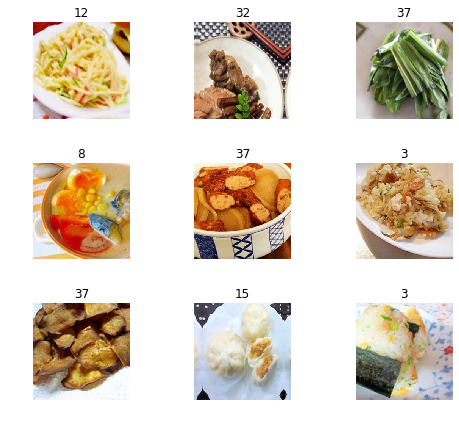

In [8]:
data.show_batch(rows=3, figsize=(7,6))

In [31]:
learn = create_cnn(data, models.resnet50, metrics = accuracy )

In [30]:
create_cnn??

In [23]:
learn.fit_one_cycle(2)

Total time: 1:16:30
epoch  train_loss  valid_loss  accuracy
1      2.014895    1.938367    0.465758  (38:17)
2      1.932232    1.824648    0.495101  (38:13)



In [24]:
learn.save('stage1')

In [89]:
learn.fit_one_cycle(1)

Total time: 39:19
epoch  train_loss  valid_loss  accuracy
1      1.902963    1.811672    0.498301  (39:19)



In [90]:
learn.save('stage2')

In [94]:
learn.unfreeze()

In [95]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


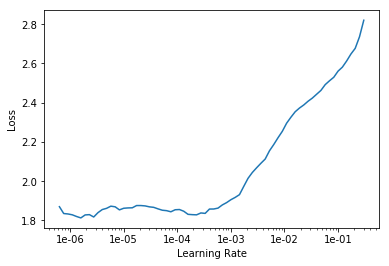

In [96]:
learn.recorder.plot()

In [97]:
learn.fit_one_cycle(1,max_lr = slice(1e-6,3e-4))

Total time: 50:30
epoch  train_loss  valid_loss  accuracy
1      1.787764    1.741505    0.517727  (50:30)



In [98]:
learn.save('stage3')

In [99]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


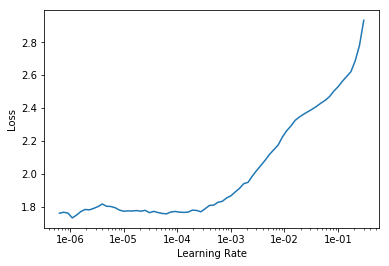

In [100]:
learn.recorder.plot()

In [101]:
learn.fit_one_cycle(1,max_lr = slice(1e-6,2e-4))

Total time: 50:29
epoch  train_loss  valid_loss  accuracy
1      1.755835    1.709845    0.526390  (50:29)



In [102]:
learn.save('stage4')

In [103]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


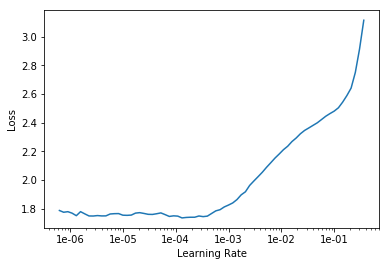

In [104]:
learn.recorder.plot()

In [105]:
learn.fit_one_cycle(1,max_lr = slice(1e-6,2e-4))

Total time: 50:29
epoch  train_loss  valid_loss  accuracy
1      1.752874    1.688942    0.532827  (50:29)



In [106]:
learn.save('stage5')

In [107]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


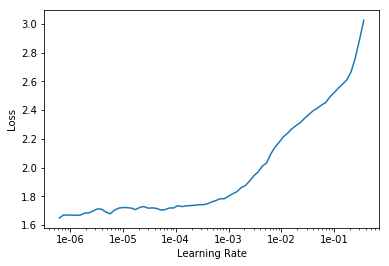

In [108]:
learn.recorder.plot()

In [109]:
learn.fit_one_cycle(1,max_lr = slice(1e-6,8e-5))

Total time: 50:29
epoch  train_loss  valid_loss  accuracy
1      1.712169    1.677835    0.534161  (50:29)



In [110]:
learn.save('stage6')

In [9]:
learn.load('stage6')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (443725 items)
[Category 40, Category 31, Category 33, Category 3, Category 37]...
Path: training-data/train-images
x: ImageItemList (443725 items)
[Image (3, 180, 240), Image (3, 180, 240), Image (3, 320, 240), Image (3, 180, 240), Image (3, 320, 240)]...
Path: training-data/train-images;
Valid: LabelList
y: CategoryList (110931 items)
[Category 13, Category 13, Category 37, Category 3, Category 37]...
Path: training-data/train-images
x: ImageItemList (110931 items)
[Image (3, 180, 240), Image (3, 180, 240), Image (3, 319, 240), Image (3, 180, 240), Image (3, 320, 240)]...
Path: training-data/train-images;
Test: LabelList
y: CategoryList (1 items)
[]...
Path: training-data/train-images
x: ImageItemList (1 items)
[]...
Path: training-data/train-images, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, af

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


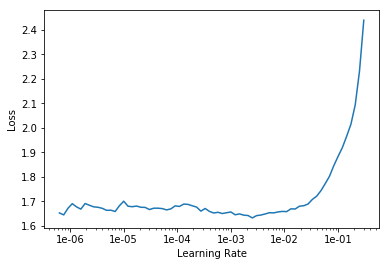

In [27]:
learn.recorder.plot()

In [35]:
bs=64

In [36]:
learn.fit_one_cycle(1,max_lr = slice(1e-6,3e-3))

Total time: 39:51
epoch  train_loss  valid_loss  accuracy
1      1.695604    1.677498    0.534521  (39:51)



In [37]:
learn.save('stage7')

In [38]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


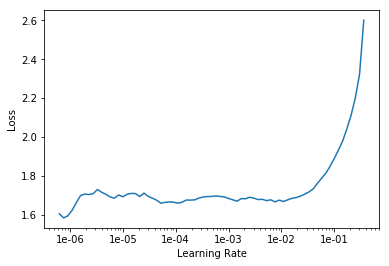

In [39]:
learn.recorder.plot()

In [40]:
learn.fit_one_cycle(1,max_lr = slice(1e-5,1e-2))

Total time: 38:21
epoch  train_loss  valid_loss  accuracy
1      1.716788    1.696086    0.531186  (38:21)



In [41]:
learn.save('stage8')

In [32]:
learn.load('stage7')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (443725 items)
[Category 40, Category 31, Category 33, Category 3, Category 37]...
Path: training-data/train-images
x: ImageItemList (443725 items)
[Image (3, 180, 240), Image (3, 180, 240), Image (3, 320, 240), Image (3, 180, 240), Image (3, 320, 240)]...
Path: training-data/train-images;

Valid: LabelList
y: CategoryList (110931 items)
[Category 13, Category 13, Category 37, Category 3, Category 37]...
Path: training-data/train-images
x: ImageItemList (110931 items)
[Image (3, 180, 240), Image (3, 180, 240), Image (3, 319, 240), Image (3, 180, 240), Image (3, 320, 240)]...
Path: training-data/train-images;

Test: LabelList
y: CategoryList (1 items)
[]...
Path: training-data/train-images
x: ImageItemList (1 items)
[]...
Path: training-data/train-images, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1,

In [48]:
df_sub = pd.read_csv('rakutensample.csv')

In [49]:
#learn.get_preds(ds_type=DatasetType.Test)

In [50]:
df_sub['ids'] = df_sub['Image-Id']

In [51]:
ds = learn.data.single_dl.dataset
ds.set_item(img)

In [65]:
flabel = []

for file in df_sub.ids:
    img = open_image(path_test+file)
    _,_,tens = learn.predict(img)
    s = reversed(np.argsort(tens))
    fir = str(ds.y.reconstruct(s[0]))
    sec = str(ds.y.reconstruct(s[1]))
    thir = str(ds.y.reconstruct(s[1]))
    final = (fir+','+sec+','+thir)
    #print(final)
    flabel.append(final)


SyntaxError: EOL while scanning string literal (<ipython-input-65-00ccd04b2365>, line 13)

In [57]:
df_sub = pd.read_csv('rakutensample.csv')

In [58]:
df_sub.head()

,Image-Id,Category
0,1070009628.jpg,"1,16,35"
1,1270003891.jpg,"15,40,24"
2,1750009035.jpg,"28,9,8"
3,1070036376.jpg,"10,23,7"
4,1670001478.jpg,"38,35,36"


In [61]:
df_sub['Category'] = flabel

In [60]:
df_sub.head()

,Image-Id,Category
0,1070009628.jpg,"1,16,35"
1,1270003891.jpg,"15,40,24"
2,1750009035.jpg,"28,9,8"
3,1070036376.jpg,"10,23,7"
4,1670001478.jpg,"38,35,36"


In [25]:
df_sub.to_csv('subm_1.csv', index = False)